In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')

In [2]:
data=pd.read_csv(r"C:\Users\Bhavya\Downloads\Audit Risk - ML-20241120T052914Z-001\Audit Risk - ML\Audit_firm_risk_factors.csv")

In [3]:
data.head()

,Unnamed: 0,PARA_A,PARA_B,TOTAL,Sector_score,numbers,LOSS_SCORE,Money_Value,History_score,District,Risk
0,0,4.18,2.50,6.68,3.89,5.0,2,3.38,2,2,1
1,1,0.00,4.83,4.83,3.89,5.0,2,0.94,2,2,0
2,2,0.51,0.23,0.74,3.89,5.0,2,0.00,2,2,0
3,3,0.00,10.80,10.80,3.89,6.0,2,11.75,2,2,1
4,4,0.00,0.08,0.08,3.89,5.0,2,0.00,2,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     776 non-null    int64  
 1   PARA_A         776 non-null    float64
 2   PARA_B         776 non-null    float64
 3   TOTAL          776 non-null    float64
 4   Sector_score   776 non-null    float64
 5   numbers        776 non-null    float64
 6   LOSS_SCORE     776 non-null    int64  
 7   Money_Value    775 non-null    float64
 8   History_score  776 non-null    int64  
 9   District       776 non-null    int64  
 10  Risk           776 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.8 KB


In [5]:
data.Money_Value.fillna(value=data.Money_Value.median(),inplace=True)

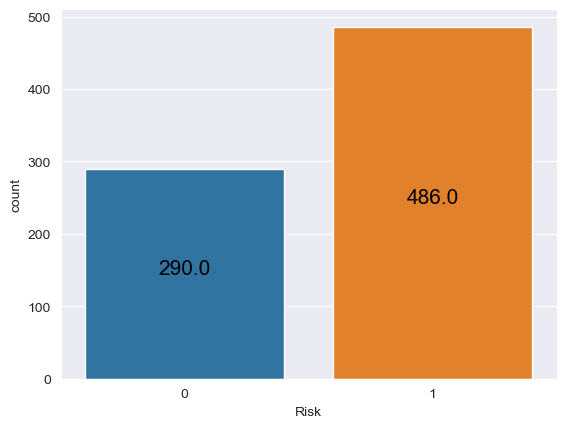

Percentage difference = -50.5%


In [6]:
plot=sns.countplot(x=data.Risk)
bars=plot.patches
plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),

              ha = 'center', fontsize = 15, color = 'black')

plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plt.show()

percentage_diff = round(100*(bars[0].get_height() - bars[1].get_height())/((bars[0].get_height() + bars[1].get_height())/2),1)

print(f'Percentage difference = {percentage_diff}%')

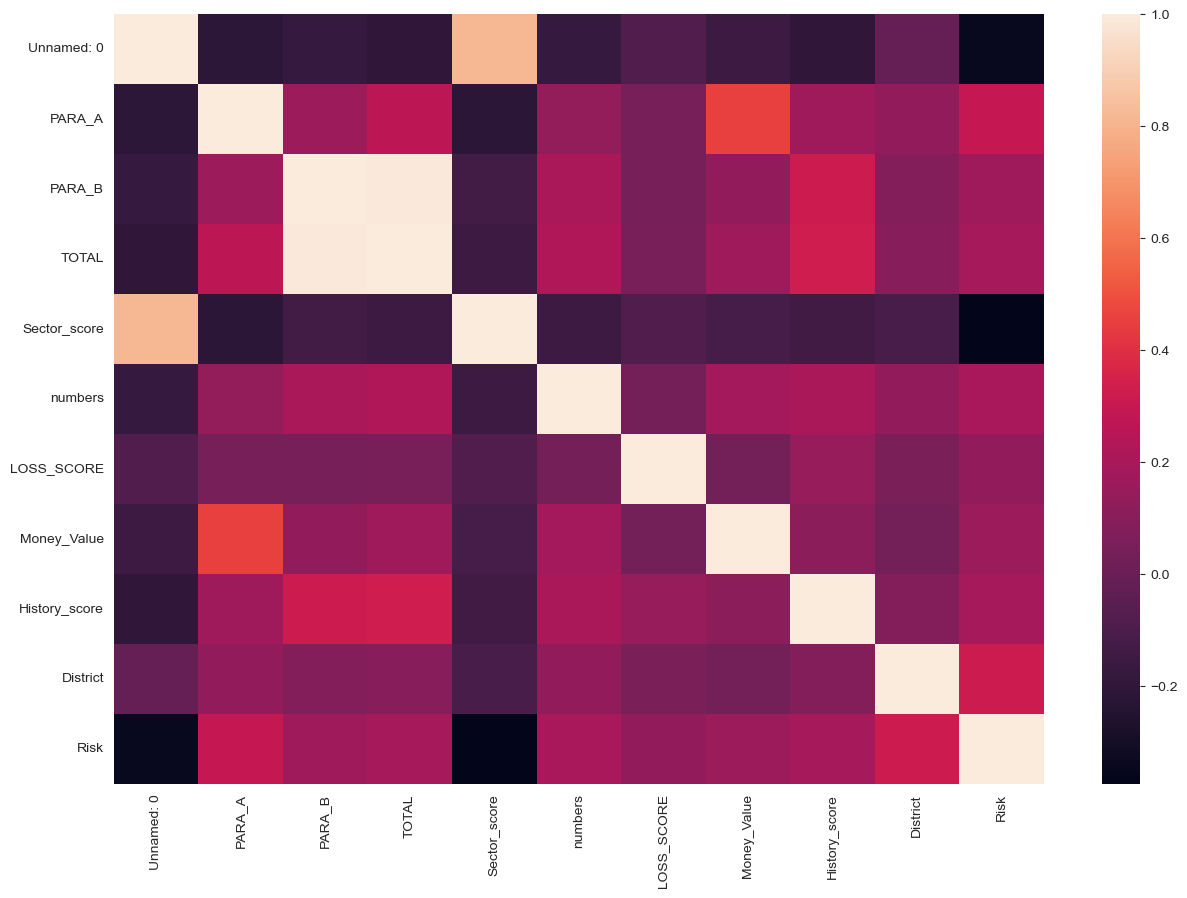

In [7]:
plt.figure(figsize = (15,10))  
sns.set_style(style = 'white')
sns.heatmap(data.corr())
plt.show()


In [8]:
data.drop(columns='TOTAL',inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,stratify=y)

In [11]:
X_train.columns

Index(['Unnamed: 0', 'PARA_A', 'PARA_B', 'Sector_score', 'numbers',
       'LOSS_SCORE', 'Money_Value', 'History_score', 'District'],
      dtype='object')

In [13]:
def fit_and_train(model,X_train,X_test,y_train,y_test):
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=round(model.score(X_test,y_test),3)

    tn,fn,tp,fp=metrics.confusion_matrix(y_test,pred).ravel()
    recall=round(tp/(tp+fn),3)
    precision=round(tp/(tp+fp),3)
    specificity=round(tn/(tn+fp),3)
    f1_score=round(2*precision*recall/(precision+recall),3)

    return score,recall,precision,specificity,f1_score
    

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
metrics=fit_and_train(dt,X_train,X_test,y_train,y_test)

In [15]:
result=pd.DataFrame(columns=['score','recall','precision','specificity','f1_score'])

In [17]:
result.loc['Decision Tree']=metrics
result

,score,recall,precision,specificity,f1_score
Decision Tree,0.979,0.75,0.025,0.374,0.048


In [18]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})
feature_importances

,features,Importance
0,Unnamed: 0,0.035836
1,PARA_A,0.540185
2,PARA_B,0.162434
3,Sector_score,0.000000
4,numbers,0.014001
5,LOSS_SCORE,0.014263
6,Money_Value,0.047043
7,History_score,0.000000
8,District,0.186238


In [19]:
most_important = list(feature_importances[feature_importances.Importance > 0.1].features)
most_important

['PARA_A', 'PARA_B', 'District']

In [20]:
X = data.loc[:,most_important]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [25]:
result.loc['Decision Tree with important variables'] = fit_and_train(dt, X_train, X_test, y_train, y_test)
result

,score,recall,precision,specificity,f1_score
Decision Tree,0.979,0.75,0.025,0.374,0.048
Decision Tree with important variables,0.948,0.70,0.057,0.375,0.105
